Model1: theta= [-0.06210842  0.03902292 -0.34025495 -0.15959605  0.58361951  0.06103426
 -0.1346369  -0.00110254] , |theta|= 0.713505286945
Model2: theta= [-0.0589147  -0.00775498  0.00801579 -0.0221506   0.11717755  0.01068621
 -0.00946226 -0.00240541] , |theta|= 0.134261230677
Model3: theta= [-0.00915592 -0.00173743  0.00623322 -0.00310414  0.02289565  0.00010443
  0.02122232 -0.00208679] , |theta|= 0.0333811547582
Train MSE for model ord=7, lambda=5 is 0.15862876039
Test MSE for model ord=7, lambda=5 is 0.173159674515
Train MSE for model ord=7, lambda=50 is 0.189787215528
Test MSE for model ord=7, lambda=50 is 0.229956341927
Train MSE for model ord=7, lambda=500 is 0.198485285483
Test MSE for model ord=7, lambda=500 is 0.253168286946


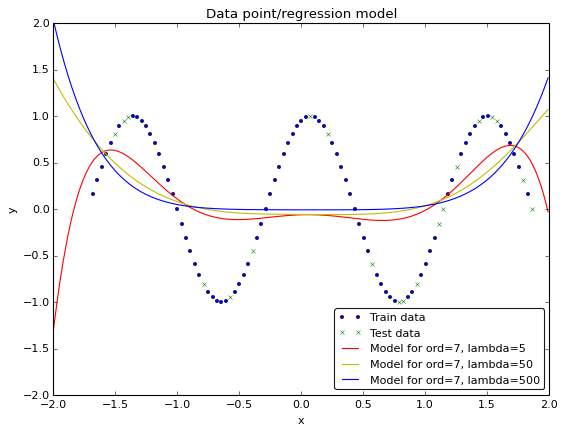

In [9]:
from base.closed_form import ClosedFormRegression
from data import data
import matplotlib
import numpy as np

# change this to your own backend
matplotlib.interactive(False)
import matplotlib.pyplot as plt
% matplotlib inline


def plot_data_point(X_train, y_train, X_test, y_test):
    plt.figure(2,figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
    plt.ylim([-2,2])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(X_train, y_train, 'o', ms=3, label='Train data')
    plt.plot(X_test, y_test, 'x', ms=3, label='Test data')
    plt.title('Data point/regression model')


def plot_regression_model(model, fmt):
    plt.figure(2)
    plt.ylim([-2,2])
    X = np.arange(-2, 2, 0.01)
    y = model.predict(X)
    plt.plot(X, y, fmt, label='Model for ' + model.description())
    plt.legend(fancybox=True, loc='lower right', framealpha=0.9, prop={'size': 10})


def plot_mse(model, mse,fig, fmt, color):
    print "Train MSE for model", model.description(), "is", mse[0]
    print "Test MSE for model", model.description(), "is", mse[1]


if __name__ == '__main__':
    X_train, y_train, X_test, y_test = data.load(train_coefficient=0.2, normalize=True)
    plt.figure()
    model3 = ClosedFormRegression(order=7, lambda_var=5)
    model5 = ClosedFormRegression(order=7, lambda_var=50)
    model7 = ClosedFormRegression(order=7, lambda_var=500)

    plot_data_point(X_train, y_train, X_test, y_test)
    
    # fit model
    model3.fit(X_train, y_train)
    model5.fit(X_train, y_train)
    model7.fit(X_train, y_train)
    
    print "Model1: theta=",model3.theta,", |theta|=",np.linalg.norm(model3.theta)
    print "Model2: theta=",model5.theta,", |theta|=",np.linalg.norm(model5.theta)
    print "Model3: theta=",model7.theta,", |theta|=",np.linalg.norm(model7.theta)

    # calculate mse
    mse3 = model3.mse(X_train, y_train), model3.mse(X_test, y_test)
    mse5 = model5.mse(X_train, y_train), model5.mse(X_test, y_test)
    mse7 = model7.mse(X_train, y_train), model7.mse(X_test, y_test)

    # Check if a plot is to be made for the entered alpha
    plot_regression_model(model3, 'r')
    plot_regression_model(model5, 'y')
    plot_regression_model(model7, 'b')

    # plot train mse,
    plot_mse(model3, mse3,1, '-', 'r')
    plot_mse(model5, mse5,2, '-', 'y')
    plot_mse(model7, mse7,3, '-', 'b')

    # show plots
    plt.show()